In [10]:
# import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/sms-spam-collection-dataset/spam.csv
/kaggle/input/hjfdfd/model.pkl


## load the datasets

In [11]:
# load the datasets using pandas
df=pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv",encoding='ISO-8859-1',usecols=["v1","v2"])

In [12]:
# top 10 records display 
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [14]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [15]:
# check the shape 
df.shape

(5572, 2)

In [16]:
# change the rename some columns 
df.rename(columns={'v1':"target","v2":"text"},inplace=True)

In [17]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
# Label encoder 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [19]:
df['target'] = encoder.fit_transform(df['target'])

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
# check the null values in dataset
df.isnull().sum()

target    0
text      0
dtype: int64

In [22]:
# check the duplicated values in dataset
df.duplicated().sum()

403

In [23]:
# remove duplicated records 
df = df.drop_duplicates(keep='first')

In [24]:
# after removed the duplicated view
df.duplicated().sum()

0

In [25]:
# check shape after remove duplicated 
df.shape

(5169, 2)

In [26]:
# 403 Rows has removed because they was duplicated rows
5169-5572

-403

# EDA

In [27]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

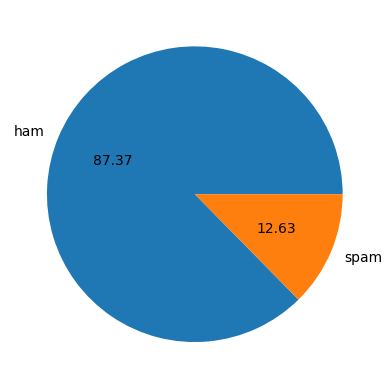

In [28]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [29]:
!pip install nltk
import nltk
nltk.download('punkt',quiet=True)

True

In [30]:
df['characters'] = df['text'].apply(len)
df['characters']

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: characters, Length: 5169, dtype: int64

In [31]:
df['words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['words']

0       23
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: words, Length: 5169, dtype: int64

In [32]:
df['sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df['sentences']

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: sentences, Length: 5169, dtype: int64

In [33]:
df.head()

,target,text,characters,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df[['characters','words','sentences']].describe()

,characters,words,sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [35]:
#for ham messages
df[df['target'] == 0][['characters','words','sentences']].describe()

,characters,words,sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [36]:
#for spam messages
df[df['target'] == 1][['characters','words','sentences']].describe()

,characters,words,sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


In [37]:
!pip install seaborn 
import seaborn as sns

<Axes: xlabel='characters', ylabel='Count'>

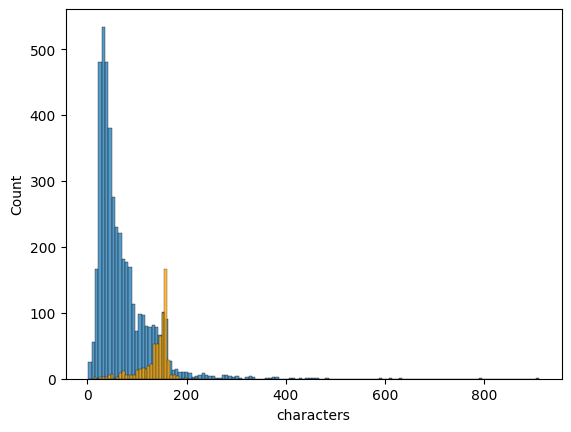

In [38]:
sns.histplot(df[df['target'] == 0]['characters'])
sns.histplot(df[df['target'] == 1]['characters'],color='orange')

<Axes: xlabel='words', ylabel='Count'>

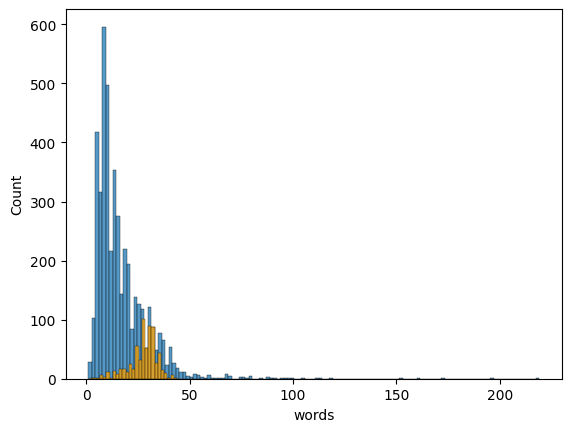

In [39]:
sns.histplot(df[df['target'] == 0]['words'])
sns.histplot(df[df['target'] == 1]['words'],color='orange')

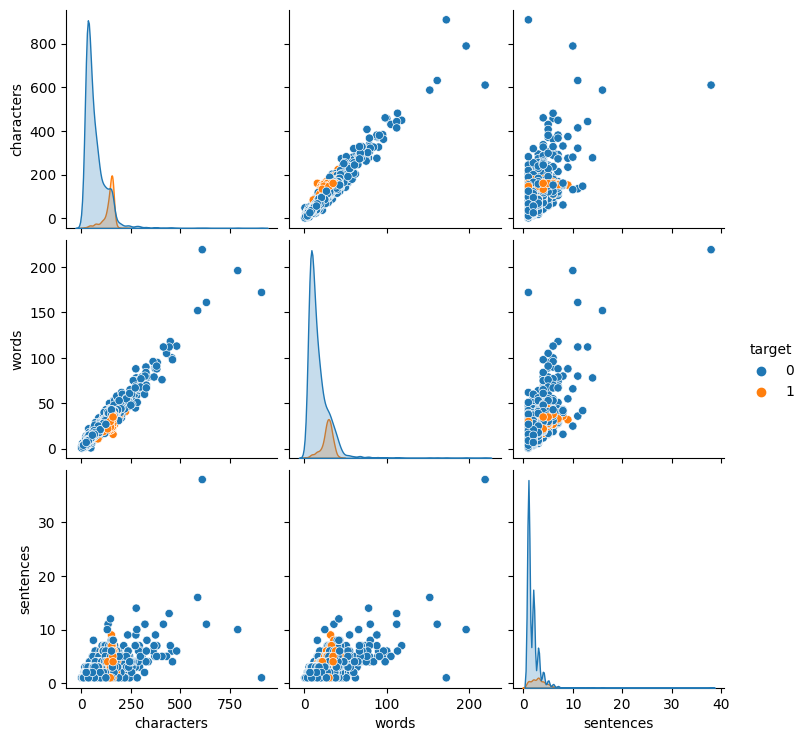

In [40]:
sns.pairplot(df,hue='target')

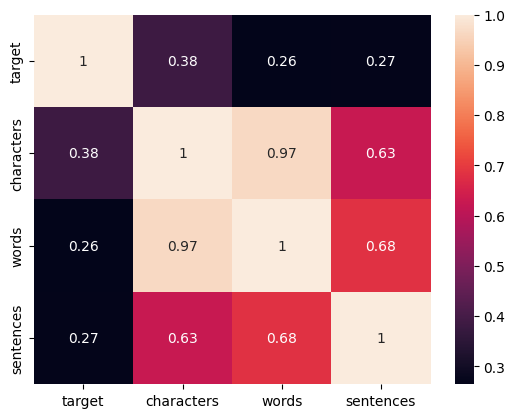

In [41]:
numeric_df = df.select_dtypes(include=['float64','int32','int64'])
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

# Data Preprocessing

In [42]:
nltk.download('all')
import string
string.punctuation

from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /usr/share/nltk_data...
[nltk_data]    | Downloading pa

In [43]:
def transform(text):                          
    text = text.lower()                     #Lower_case
    text = nltk.word_tokenize(text)         #word_tokenization
    
    y=[]
    for i in text:
        if i.isalnum():                     #removing non alpha-numeric characters
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:                          #removing stopwords and punctuations
        if i not in english_stopwords and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))                #stemming
            
    return " ".join(y)

In [44]:
df['transformed_text'] = df['text'].apply(transform)

In [45]:
df.head()

,target,text,characters,words,sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [46]:
!pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [47]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))     # for spam

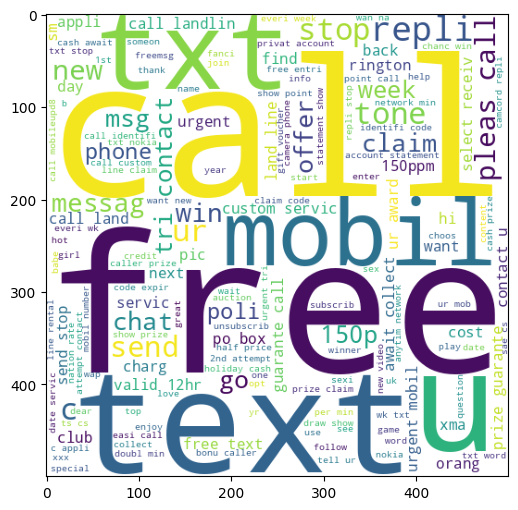

In [48]:
plt.figure(figsize=(13,6))        #for spam
plt.imshow(spam_wc)

In [49]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))     #for ham

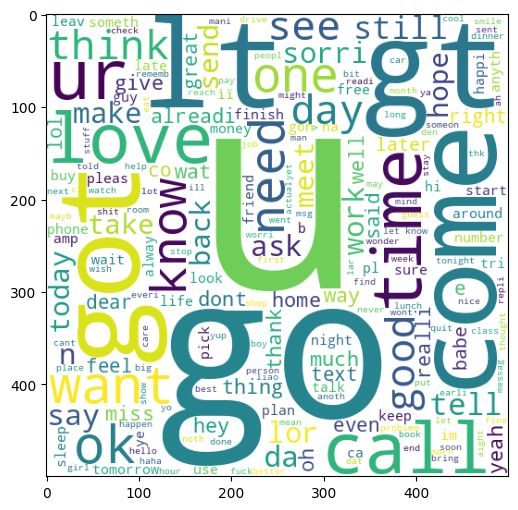

In [50]:
plt.figure(figsize=(13,6))        #for ham
plt.imshow(ham_wc)

In [51]:
spam_corpus = []
for message in df[df['target'] == 1]['transformed_text'].tolist():
    for word in message.split():
        spam_corpus.append(word)

In [52]:
len(spam_corpus)

9883

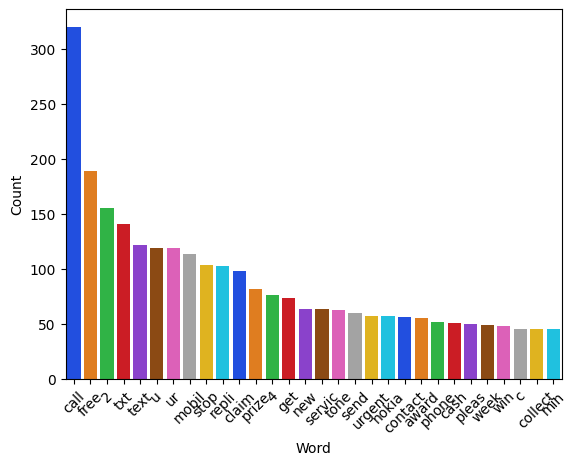

In [53]:
from collections import Counter
word_counter = Counter(spam_corpus)

# Convert Counter data to a DataFrame
word_counts_df = pd.DataFrame(word_counter.most_common(30), columns=['Word', 'Count'])

# Create a barplot using seaborn
sns.barplot(x='Word', y='Count', data=word_counts_df,palette="bright")


plt.xticks(rotation=45)
plt.show()

In [54]:
ham_corpus = []
for message in df[df['target'] == 0]['transformed_text'].tolist():
    for word in message.split():
        ham_corpus.append(word)

In [55]:
len(ham_corpus)

34771

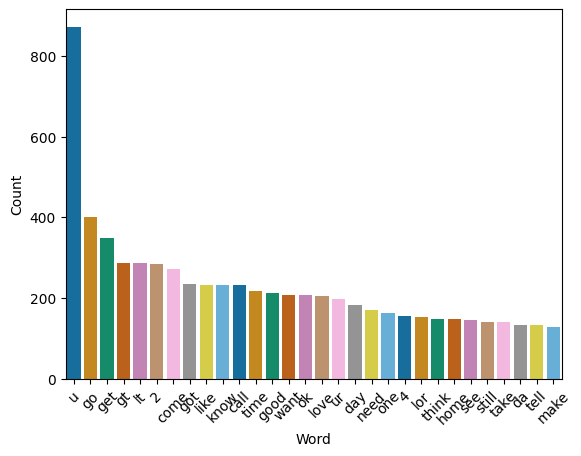

In [56]:
word_counter2 = Counter(ham_corpus)

# Convert Counter data to a DataFrame
word_counts_df2 = pd.DataFrame(word_counter2.most_common(30), columns=['Word', 'Count'])

# Create a barplot using seaborn
sns.barplot(x='Word', y='Count', data=word_counts_df2,palette="colorblind")

plt.xticks(rotation=45)
plt.show()

# Model Building

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [58]:
df['transformed_text']

0       go jurong point avail bugi n great world la e ...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: transformed_text, Length: 5169, dtype: object

In [59]:
y = df['target'].values

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [61]:
from sklearn.naive_bayes import MultinomialNB                  #performs best with best precision
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

mnb = MultinomialNB()

In [62]:
#Here MultinomialNB is best, as data is imbalanced, so precision matters alot.
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
# Print accuracy score
print("Accuracy Score:", accuracy_score(y_test, y_pred2))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))

# Print precision score
print("Precision Score:", precision_score(y_test, y_pred2))

Accuracy Score: 0.971953578336557
Confusion Matrix:
 [[896   0]
 [ 29 109]]
Precision Score: 1.0


# Predictions With model

In [63]:
# prediction is 
inputs=["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."]
inputtrans=tfidf.transform(inputs)
prediction=mnb.predict(inputtrans)
#print("Ham means is {}".format(prediction))


if prediction==[0]:
    print("Ham")
else:
    print("spam")

Ham


In [64]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer()
inputs=["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."]
t1=transformer.transform(inputs)

inputtrans=tfidf.transform(t1)
prediction=mnb.predict(inputtrans)
prediction

array([0])

# own model make a pickle file 

In [65]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

# how to use Saved model 

In [66]:
import pickle
import numpy as np
from sklearn.preprocessing import FunctionTransformer



# Load the pickle file
with open('/kaggle/working/model.pkl', 'rb') as f:
    model = pickle.load(f)

transformer = FunctionTransformer()
#inputs=["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."]
inputs=["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]
t1=transformer.transform(inputs)



inputtrans=tfidf.transform(t1)
prediction=model.predict(inputtrans)


if prediction==[0]:
    print("hum")
    
else:
    print("Spam")

Spam


In [67]:
type(inputtrans)

scipy.sparse._csr.csr_matrix